In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)
sns.set()

In [2]:
df=pd.read_csv(r'data/homepage_actions.csv')
df.head()

,timestamp,id,group,action
0,2016-09-24 17:42:27.839496,804196,experiment,view
1,2016-09-24 19:19:03.542569,434745,experiment,view
2,2016-09-24 19:36:00.944135,507599,experiment,view
3,2016-09-24 19:59:02.646620,671993,control,view
4,2016-09-24 20:26:14.466886,536734,experiment,view


In [5]:
control=df.query('group=="control"')
experiment=df.query('group=="experiment"')

In [7]:
control_ctr=control.query('action=="click"')['id'].nunique()/control.query('action=="view"')['id'].nunique()
control_ctr

0.2797118847539016

In [8]:
experiment_ctr=experiment.query('action=="click"')['id'].nunique()/experiment.query('action=="view"')['id'].nunique()
experiment_ctr

0.3097463284379172

In [9]:
obs_diff_ctr=experiment_ctr-control_ctr
obs_diff_ctr

0.030034443684015644

H0: Mnew-Mold<=0

In [12]:
diff=[]
for i in range(10000):
    boot_sample=df.sample(df.shape[0],replace=True)
    control=boot_sample.query('group=="control"')
    experiment=boot_sample.query('group=="experiment"')
    control_ctr=control.query('action=="click"')['id'].nunique()/control.query('action=="view"')['id'].nunique()
    experiment_ctr=experiment.query('action=="click"')['id'].nunique()/experiment.query('action=="view"')['id'].nunique()
    diff.append(experiment_ctr-control_ctr)
diff=np.array(diff)

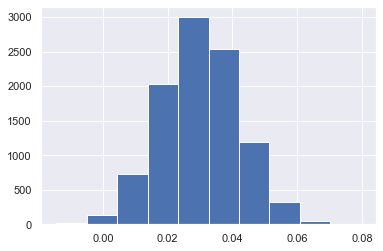

In [13]:
plt.hist(diff);

In [14]:
diff.std()

0.011914070883505695

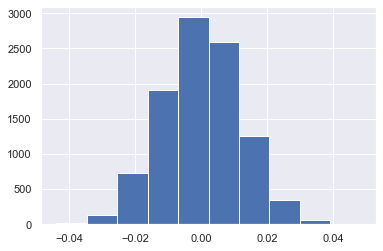

In [16]:
null_values=np.random.normal(0,diff.std(),10000)
plt.hist(null_values);


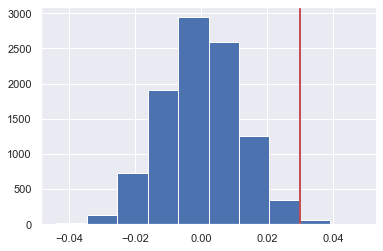

In [17]:
plt.hist(null_values);
plt.axvline(obs_diff_ctr,color='r',linewidth=2);

In [18]:
p=(null_values>obs_diff_ctr).mean()
p

0.0063

In [ ]:
p<0.05 => reject null hypothises